In [11]:
import numpy as np
from sympy import *
init_printing()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [8]:
x = symbols('x')
y = Function('y')('x')
u = Function('u')('x')

a = symbols('a')
b = symbols('b')
c = symbols('c')

phi1 = Function('varphi_1')('x')
phi2 = Function('varphi_2')('x')
phi3 = Function('varphi_3')('x')

psi1 = symbols('psi_1')
psi2 = symbols('psi_2')
psi3 = symbols('psi_3')

dx = symbols('dx')
dp1 = symbols('d\\phi_1')
dp2 = symbols('d\\phi_2')
dp3 = symbols('d\\phi_3')

differentials = {diff(phi1,x):dp1, diff(phi2,x):dp2, diff(phi3,x):dp3}

In [3]:
F_U = Matrix([[cos(phi1),-sin(phi1),0],[sin(phi1),cos(phi1),0],[0,0,1]])
F_Y = Matrix([[cos(phi2),0,-sin(phi2)],[0,1,0],[sin(phi2),0,cos(phi2)]])
F_X = Matrix([[1,0,0],[0,cos(phi3),-sin(phi3)],[0,sin(phi3),cos(phi3)]])

F = F_U*F_Y*F_X

R_U = Matrix([[cos(psi1),-sin(psi1),0],[sin(psi1),cos(psi1),0],[0,0,1]])
R_Y = Matrix([[cos(psi2),0,-sin(psi2)],[0,1,0],[sin(psi2),0,cos(psi2)]])
R_X = Matrix([[1,0,0],[0,cos(psi3),-sin(psi3)],[0,sin(psi3),cos(psi3)]])

R = R_X*R_Y*R_U

z = Matrix([x,y,u])
v = Matrix([a,b,c])

In [4]:
X = simplify((R*z+v).row(0)[0])
Y = simplify((R*z+v).row(1)[0])
U = simplify((R*z+v).row(2)[0])
F_new = R*F

Dx = diff(X,x)
Y_x = simplify(diff(Y,x)/Dx)
Y_xx = diff(Y_x,x)/Dx
U_x = simplify(diff(U,x)/Dx)
U_xx = diff(U_x,x)/Dx

F_new_x = diff(F_new,x)/Dx
F_new_xx = diff(F_new_x,x)/Dx

identity = {a:0, b:0, c:0, psi1:0, psi2:0, psi3:0}

In [14]:
A = simplify(diff(F)*F.transpose()).subs(differentials)-simplify(diff(F,x)*F.transpose())*dx

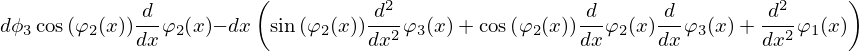

In [16]:
diff(A[1,0],x)

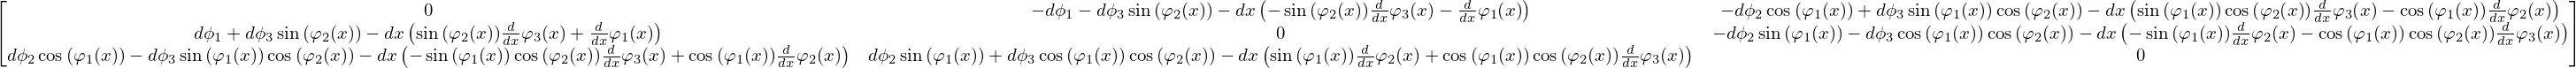

In [18]:
print(latex(A))

\left[\begin{matrix}0 & - d\phi_1 - d\phi_3 \sin{\left (\varphi_{2}{\left (x \right )} \right )} - dx \left(- \sin{\left (\varphi_{2}{\left (x \right )} \right )} \frac{d}{d x} \varphi_{3}{\left (x \right )} - \frac{d}{d x} \varphi_{1}{\left (x \right )}\right) & - d\phi_2 \cos{\left (\varphi_{1}{\left (x \right )} \right )} + d\phi_3 \sin{\left (\varphi_{1}{\left (x \right )} \right )} \cos{\left (\varphi_{2}{\left (x \right )} \right )} - dx \left(\sin{\left (\varphi_{1}{\left (x \right )} \right )} \cos{\left (\varphi_{2}{\left (x \right )} \right )} \frac{d}{d x} \varphi_{3}{\left (x \right )} - \cos{\left (\varphi_{1}{\left (x \right )} \right )} \frac{d}{d x} \varphi_{2}{\left (x \right )}\right)\\d\phi_1 + d\phi_3 \sin{\left (\varphi_{2}{\left (x \right )} \right )} - dx \left(\sin{\left (\varphi_{2}{\left (x \right )} \right )} \frac{d}{d x} \varphi_{3}{\left (x \right )} + \frac{d}{d x} \varphi_{1}{\left (x \right )}\right) & 0 & - d\phi_2 \sin{\left (\varphi_{1}{\left (x \rig

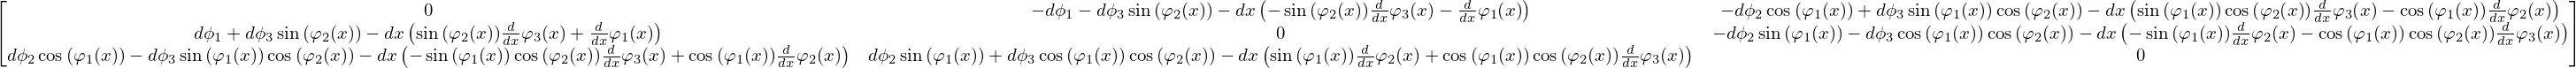

In [19]:
A